<a href="https://colab.research.google.com/github/keces/keces/blob/main/THESIS_CNN_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os, shutil, pathlib
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.layers import BatchNormalization, Conv2D, MaxPool2D, Flatten, Dense, AveragePooling2D

**Code from Python book**

- seperate to train,test,val randomly
- train on val 
- predict on test set to obtain accuracy, precision etc. 

- however, in order to do this, need to rename the files like the following: (execute only once)

In [ ]:
""""import os
os.getcwd()
collection = "/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_unseparated/malignant"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_unseparated/malignant/" + filename, "/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_unseparated/malignant/"+ "malignant_"+ str(i+1) + ".png")""""

In [ ]:
"""   import os
      os.getcwd()
      collection = "/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_unseparated/benign"
      for i, filename in enumerate(os.listdir(collection)):
          os.rename("/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_unseparated/benign/" + filename, "/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_unseparated/benign/"+ "benign_"+ str(i+1) + ".png")"""

In [ ]:
import os
os.getcwd()
collection = "/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_128/benign128"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_128/benign128/"  + filename, "/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_128/benign128/"+ "benign_"+ str(i+1) + ".png")

In [ ]:
import os
os.getcwd()
collection = "/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_128/malignant128"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_128/malignant128/" + filename, "/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_128/malignant128/"+ "malignant_"+ str(i+1) + ".png")

In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path("/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_128/malignant128")
new_base_dir = pathlib.Path("/content/drive/MyDrive/THESIS /subsampled")

def make_subset(subset_name,category, start_index, end_index):
      dir = new_base_dir / subset_name / category
      os.makedirs(dir ,exist_ok=True)
      fnames = [f"{category}_{i}.png" for i in range(start_index, end_index)]
      for fname in fnames:
                    shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [ ]:
make_subset("train", "malignant",start_index=1, end_index=511)
make_subset("validation","malignant", start_index=511, end_index=951)
make_subset("test","malignant", start_index=951, end_index=1391)

In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path("/content/drive/MyDrive/THESIS /UNSEPARATED/BreakHis_original_128/benign128")
new_base_dir = pathlib.Path("/content/drive/MyDrive/THESIS /subsampled")

def make_subset(subset_name,category, start_index, end_index):
      dir = new_base_dir / subset_name / category
      os.makedirs(dir ,exist_ok=True)
      fnames = [f"{category}_{i}.png" for i in range(start_index, end_index)]
      for fname in fnames:
                    shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [ ]:
make_subset("train", "benign",start_index=1, end_index=274)
make_subset("validation","benign", start_index=274, end_index=449)
make_subset("test","benign", start_index=449, end_index=624)

## **Classification task** - Non-SR applied images



In [ ]:
import os, shutil, pathlib
new_base_dir = pathlib.Path("/content/drive/MyDrive/THESIS /subsampled")

In [ ]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for malignant or 1 for benign 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 255, 255, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                        

In [ ]:
 model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(512, 512),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(512, 512),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(512, 512),
    batch_size=32)

Found 783 files belonging to 2 classes.
Found 615 files belonging to 2 classes.
Found 615 files belonging to 2 classes.


In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)

Epoch 1/30
25/25 [==============================] - 138s 4s/step - loss: 45.9551 - accuracy: 0.7676 - val_loss: 123.5100 - val_accuracy: 0.2846
Epoch 2/30
25/25 [==============================] - 19s 655ms/step - loss: 6.3323 - accuracy: 0.8519 - val_loss: 285.7644 - val_accuracy: 0.2862
Epoch 3/30
25/25 [==============================] - 19s 662ms/step - loss: 6.5204 - accuracy: 0.8519 - val_loss: 155.3877 - val_accuracy: 0.7154
Epoch 4/30
25/25 [==============================] - 19s 658ms/step - loss: 8.0917 - accuracy: 0.8519 - val_loss: 220.7833 - val_accuracy: 0.2846
Epoch 5/30
25/25 [==============================] - 19s 660ms/step - loss: 6.5435 - accuracy: 0.7599 - val_loss: 104.7704 - val_accuracy: 0.2959
Epoch 6/30
25/25 [==============================] - 19s 663ms/step - loss: 1.4906 - accuracy: 0.8557 - val_loss: 668.9960 - val_accuracy: 0.3902
Epoch 7/30
25/25 [==============================] - 19s 661ms/step - loss: 2.1375 - accuracy: 0.8710 - val_loss: 89.6542 - val_accu

In [ ]:
predict=model.predict(test_dataset)

In [ ]:
results = model.evaluate(test_dataset)

20/20 [==============================] - 7s 220ms/step - loss: 140.0299 - accuracy: 0.7772


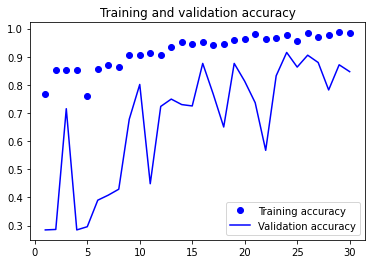

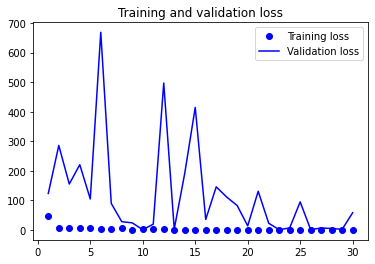

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## **Classification task** - SR applied images

In [ ]:
new_base_dir_SR = pathlib.Path("/content/drive/MyDrive/THESIS /subsampled_SR")

In [ ]:
modelSR = keras.Sequential()

# Convolutional layer and maxpool layer 1
modelSR.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
modelSR.add(keras.layers.MaxPool2D(2,2))
modelSR.add(BatchNormalization())

# Convolutional layer and maxpool layer 2
modelSR.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
modelSR.add(keras.layers.MaxPool2D(2,2))
modelSR.add(BatchNormalization())

# Convolutional layer and maxpool layer 3
modelSR.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
modelSR.add(keras.layers.MaxPool2D(2,2))
modelSR.add(BatchNormalization())

# Convolutional layer and maxpool layer 4
modelSR.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
modelSR.add(keras.layers.MaxPool2D(2,2))
modelSR.add(BatchNormalization())

# This layer flattens the resulting image array to 1D array
modelSR.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
modelSR.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for malignant or 1 for benign 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
modelSR.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
modelSR.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 255, 255, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                      

In [ ]:
 modelSR.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset_SR = image_dataset_from_directory(
    new_base_dir_sr / "train",
    image_size=(512, 512),
    batch_size=32)
validation_dataset_SR = image_dataset_from_directory(
    new_base_dir_sr / "validation",
    image_size=(512, 512),
    batch_size=32)
test_dataset_SR = image_dataset_from_directory(
    new_base_dir_sr / "test",
    image_size=(512, 512),
    batch_size=32)

In [ ]:
history2 = modelSR.fit(
    train_dataset_SR,
    epochs=30,
    validation_data=validation_dataset_SR)

Epoch 1/30
25/25 [==============================] - 150s 5s/step - loss: 45.3281 - accuracy: 0.7880 - val_loss: 2705.8318 - val_accuracy: 0.7154
Epoch 2/30
25/25 [==============================] - 16s 589ms/step - loss: 9.2355 - accuracy: 0.8455 - val_loss: 723.7643 - val_accuracy: 0.7154
Epoch 3/30
25/25 [==============================] - 16s 591ms/step - loss: 2.1353 - accuracy: 0.8301 - val_loss: 6538.4326 - val_accuracy: 0.7154
Epoch 4/30
25/25 [==============================] - 17s 591ms/step - loss: 2.5531 - accuracy: 0.8697 - val_loss: 820.2898 - val_accuracy: 0.7154
Epoch 5/30
25/25 [==============================] - 16s 591ms/step - loss: 5.7939 - accuracy: 0.8455 - val_loss: 3683.8635 - val_accuracy: 0.7154
Epoch 6/30
25/25 [==============================] - 16s 591ms/step - loss: 0.4572 - accuracy: 0.8608 - val_loss: 1637.1968 - val_accuracy: 0.7171
Epoch 7/30
25/25 [==============================] - 17s 602ms/step - loss: 0.5060 - accuracy: 0.8659 - val_loss: 1792.8971 - va

In [ ]:
predict3=model2.predict(test_dataset_or)

In [ ]:
results3 = model2.evaluate(test_dataset_or)

20/20 [==============================] - 90s 2s/step - loss: 536.6851 - accuracy: 0.8520


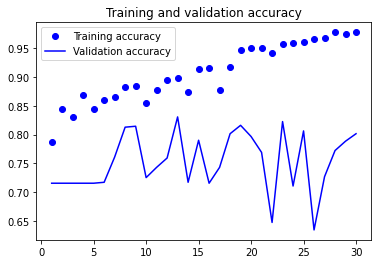

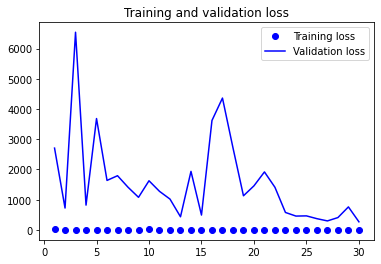

In [ ]:
import matplotlib.pyplot as plt

accuracy = history3.history["accuracy"]
val_accuracy = history3.history["val_accuracy"]
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## **Classification task** - Non-SR applied directly 512x512 images. 

without downsampling to 128x128 then upsampling to 512x512 but directly changing the size to 512x512 from 700x460. 



In [ ]:
new_base_dir_or = pathlib.Path("/content/drive/MyDrive/THESIS /subsampled_originalres")

In [ ]:
model2 = keras.Sequential()

# Convolutional layer and maxpool layer 1
model2.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(BatchNormalization())

# Convolutional layer and maxpool layer 2
model2.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(BatchNormalization())

# Convolutional layer and maxpool layer 3
model2.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(BatchNormalization())

# Convolutional layer and maxpool layer 4
model2.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(BatchNormalization())

# This layer flattens the resulting image array to 1D array
model2.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model2.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for malignant or 1 for benign 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
 model2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset_or = image_dataset_from_directory(
    new_base_dir_or / "train",
    image_size=(512, 512),
    batch_size=32)
validation_dataset_or = image_dataset_from_directory(
    new_base_dir_or / "validation",
    image_size=(512, 512),
    batch_size=32)
test_dataset_or = image_dataset_from_directory(
    new_base_dir_or / "test",
    image_size=(512, 512),
    batch_size=32)

Found 783 files belonging to 2 classes.
Found 615 files belonging to 2 classes.
Found 615 files belonging to 2 classes.


In [ ]:
history3 = model2.fit(
    train_dataset_or,
    epochs=30,
    validation_data=validation_dataset_or)

Epoch 1/30
25/25 [==============================] - 182s 6s/step - loss: 57.3267 - accuracy: 0.7944 - val_loss: 4137.5474 - val_accuracy: 0.2846
Epoch 2/30
25/25 [==============================] - 27s 982ms/step - loss: 18.6635 - accuracy: 0.8250 - val_loss: 2284.0623 - val_accuracy: 0.2846
Epoch 3/30
25/25 [==============================] - 27s 986ms/step - loss: 12.0004 - accuracy: 0.8570 - val_loss: 64.8496 - val_accuracy: 0.2813
Epoch 4/30
25/25 [==============================] - 27s 971ms/step - loss: 0.7372 - accuracy: 0.8685 - val_loss: 163.9948 - val_accuracy: 0.2846
Epoch 5/30
25/25 [==============================] - 27s 966ms/step - loss: 22.0007 - accuracy: 0.8110 - val_loss: 240.6838 - val_accuracy: 0.7220
Epoch 6/30
25/25 [==============================] - 27s 974ms/step - loss: 3.3485 - accuracy: 0.8710 - val_loss: 90.9938 - val_accuracy: 0.3756
Epoch 7/30
25/25 [==============================] - 27s 983ms/step - loss: 0.7365 - accuracy: 0.8723 - val_loss: 19.2996 - val_a

In [ ]:
predict3=model2.predict(test_dataset_or)

In [ ]:
results3 = model2.evaluate(test_dataset_or)

20/20 [==============================] - 12s 301ms/step - loss: 44.8404 - accuracy: 0.7220
